# Visualize Predictions, Precision/Recall Curves, Training Loss

In [ ]:
# visualize() renders predictions of crops/images
# stores them under models/<S@N@A@RES>/<modelseries name>/playground/<checkpoint>/<conf_tresh>

import torch
import torchvision.models as models
import model as m
import dataset as d
import eval
import util
import config as c
import ModelSeries as ms
from importlib import reload
import os
reload(eval)
reload(util)
reload(d)
reload(m)
reload(ms)

def visualize(gt_df, series, conf_thr = 0.1):
    eval_dataset = d.CroppedDataset(gt_df, mode = "val")
    print(f"debug visualize: len(eval_dataset): {len(eval_dataset)}")
    series.model.eval()
    series.model.to("cuda")

    
    dir = os.path.join(series.series_dir, "playground", f"{series.getEpoch()}")
    os.makedirs(dir, exist_ok=True)

    for i in range(20):
        idx = i * 200
        try:
            image, target = eval_dataset[idx % len(eval_dataset)]
            image, target = image.to("cuda"), target.to("cuda")
        except Exception:
            print("error loading the image")
            print(f"type image, target: {type(image), type(target)}")
            continue
        image = image.unsqueeze(0)  # [1, H, W]

        

        with torch.no_grad():
            pred = series.model(image.unsqueeze(0))  # [1, 1, H, W] -> model -> [1, N, N, A, 5+C]
            pred = pred.squeeze(0)  # [N, N, A, 5+C]

        pred = eval.logit_to_target(pred)

        iou = eval.pred_to_iou(pred, target)
        mAP = f"{eval.unit_precision(pred, target, iou, conf_thr=conf_thr):.4f}"
        rec = f"{eval.unit_recall(pred, target, iou, conf_thr=conf_thr):.4f}"
        util.render_crop_from_dataset(image, pred, out_dir = os.path.join(dir, f"{conf_thr}"), name = f"crop_{i}_{mAP}_{rec}.png", obj_thres=conf_thr)
    print(f"Visualization saved to {dir}")

Saving to: c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\ds2_dense\ds2_dense\gt_space.json
val-dataset created containing 1149 crops
ModelSeries: loadJsonData()
[loadMode] Loaded weights from c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\checkpoints\57.pth
val-dataset created containing 1149 crops
debug visualize: len(eval_dataset): 1149


c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\util.py:457: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))


debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


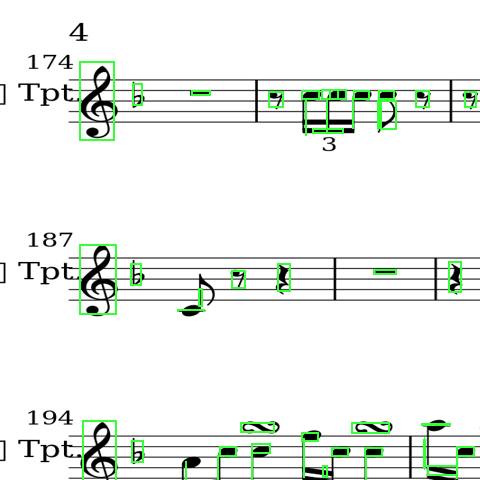

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_0_0.7917_0.5600.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


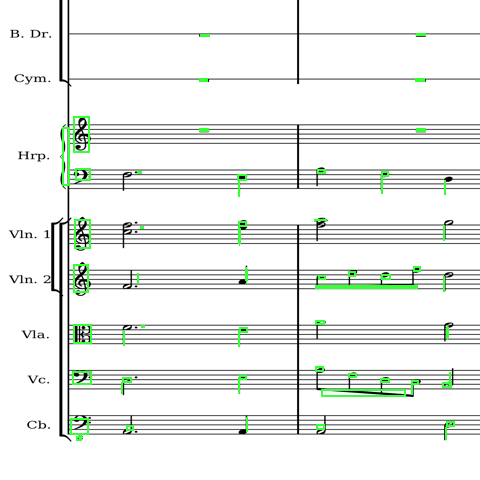

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_1_0.8889_0.3333.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


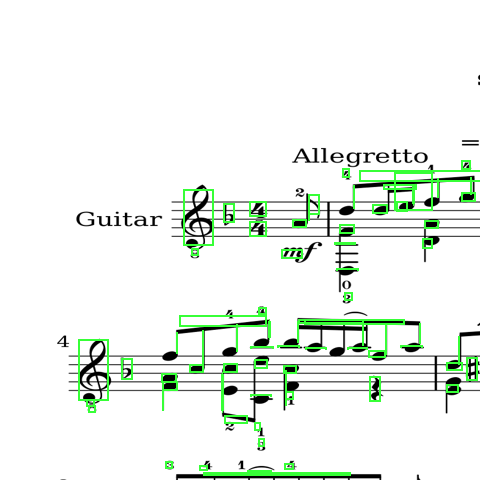

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_2_0.8000_0.3402.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


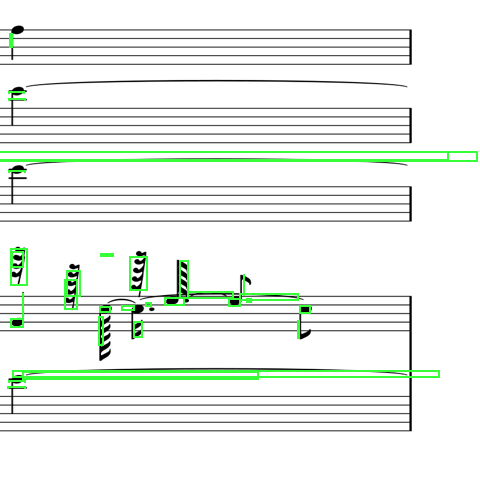

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_3_0.1579_0.1667.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


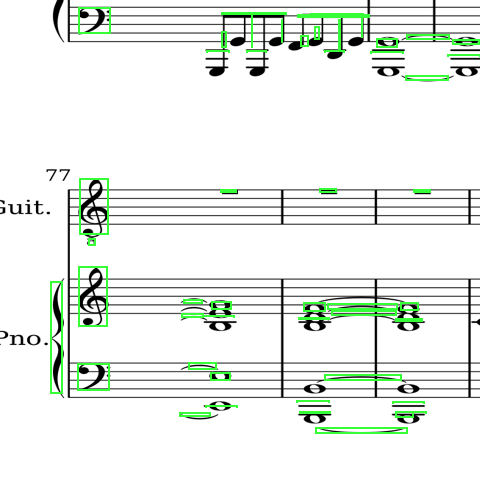

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_4_0.5625_0.2754.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


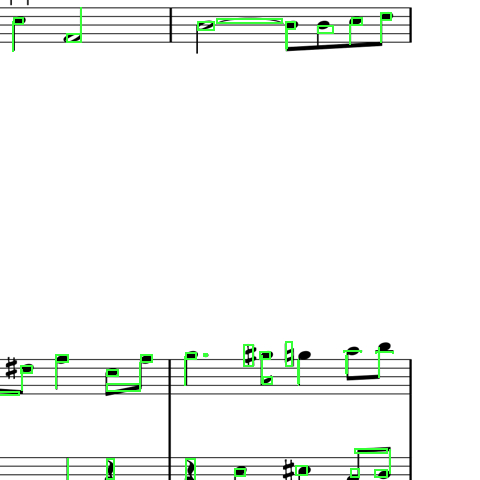

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_5_0.6250_0.4717.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


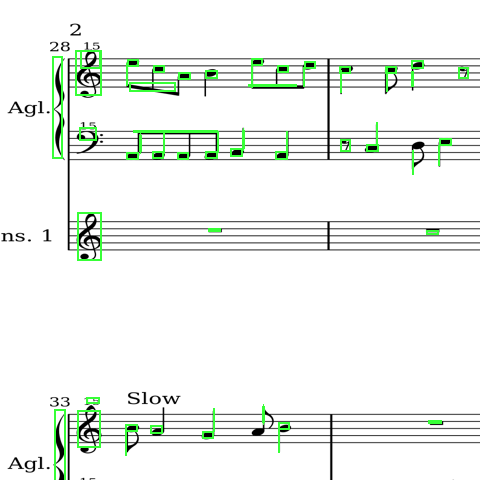

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_6_0.8571_0.5000.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


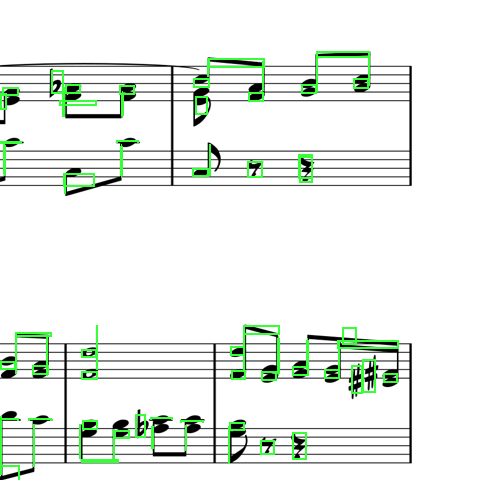

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_7_0.5294_0.2990.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


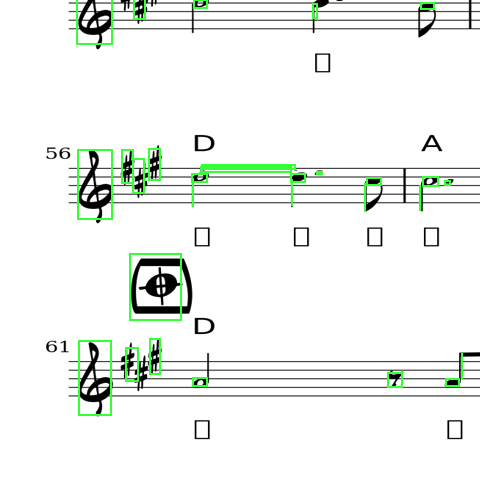

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_8_0.9091_0.5588.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


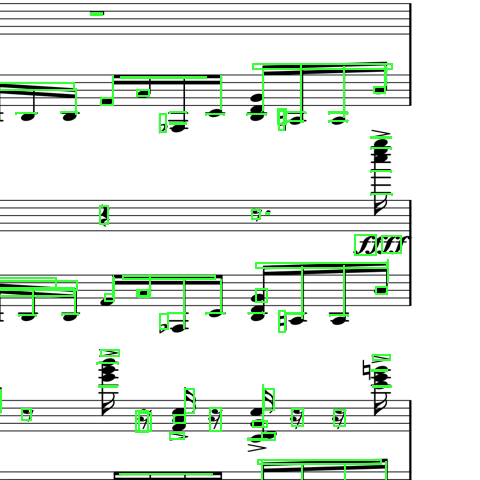

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_9_0.5429_0.2941.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


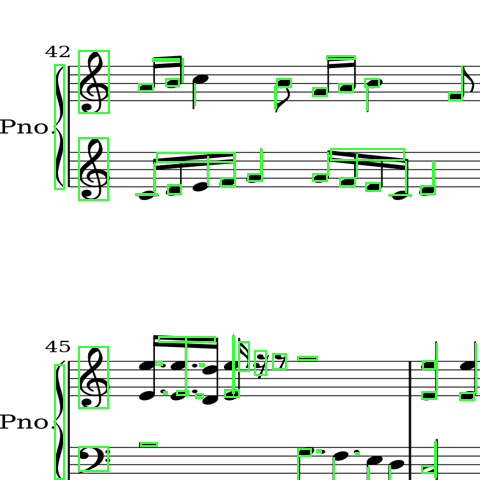

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_10_0.9130_0.4130.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


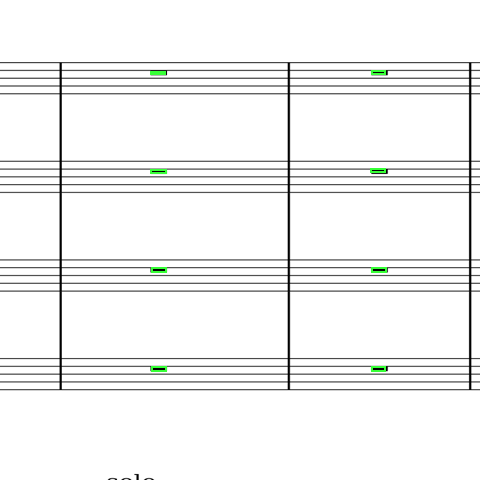

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_11_1.0000_1.0000.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


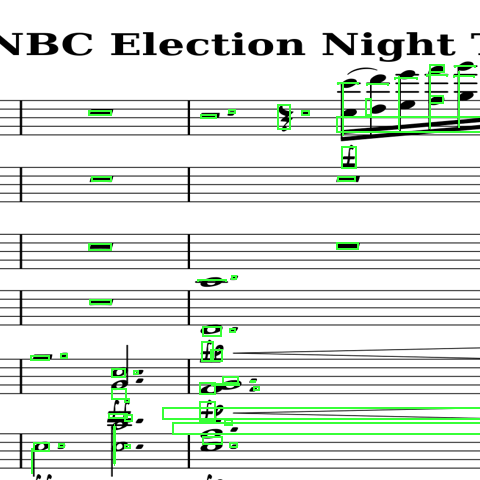

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_12_0.6154_0.3380.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


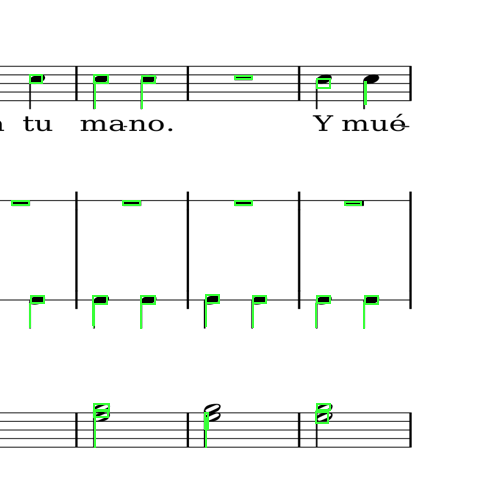

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_13_0.6111_0.4444.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


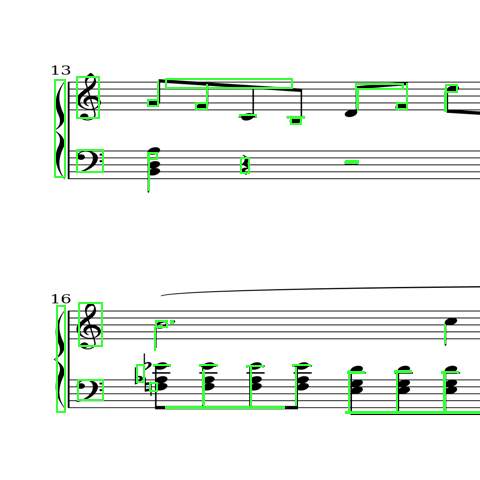

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_14_1.0000_0.3231.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


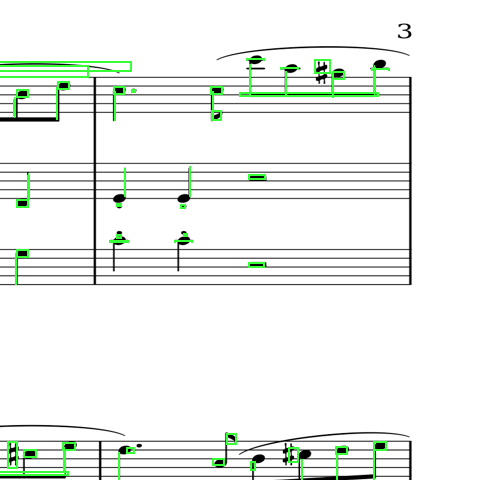

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_15_0.6429_0.3088.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


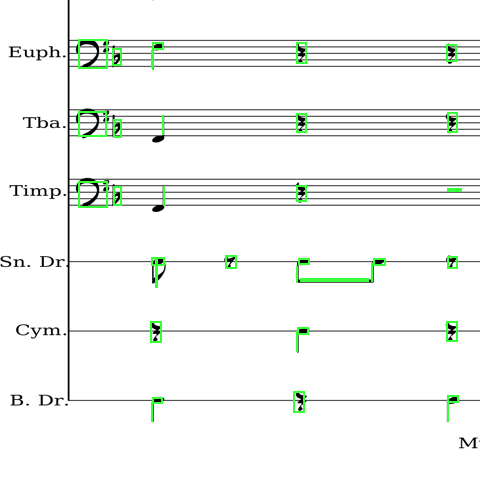

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_16_0.9231_0.7027.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


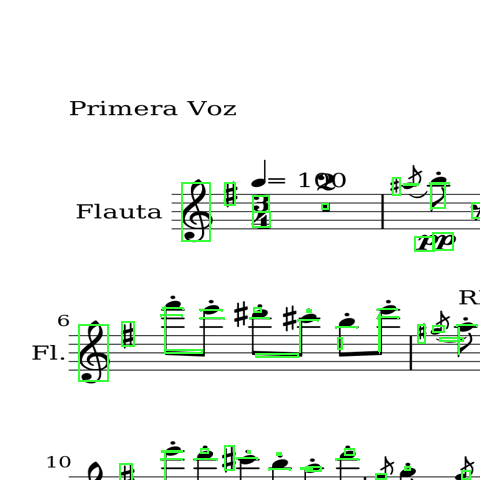

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_17_0.6111_0.2805.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


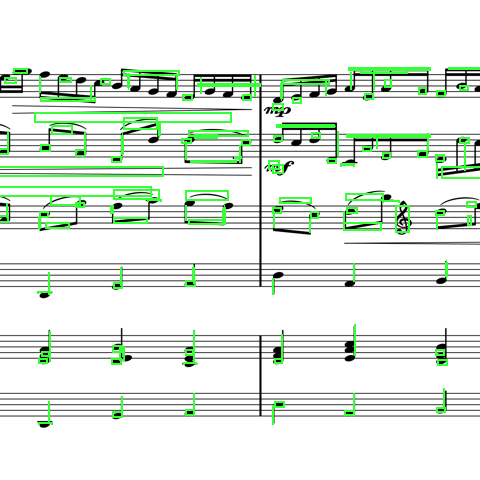

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_18_0.4048_0.2842.png
debug render_crop_from_dataset: target.shape: torch.Size([20, 20, 2, 141])


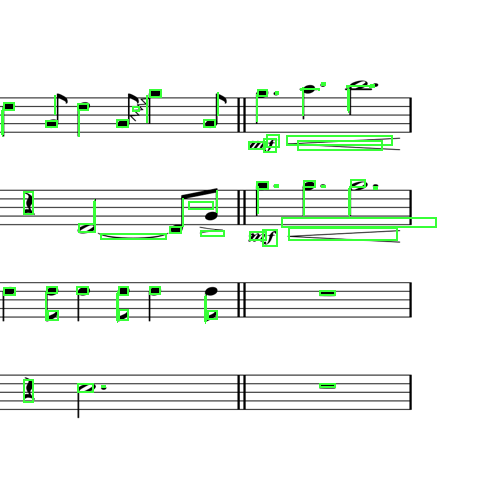

[render_crop_from_dataset] saved → c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57\0.1\crop_19_0.6957_0.5000.png
Visualization saved to c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\playground\57


In [152]:
import ModelSeries as ms
de = util.DataExtractor()
gt_df = de.croppedData()

eval_dataset = d.CroppedDataset(gt_df, mode = "val")
series = ms.ModelSeries(name = "train_with_lr1e-2_tryC", mode = "training")

visualize(gt_df, series, conf_thr = 0.1)

# Precision and Recall

In [ ]:
import eval
import ModelSeries as ms
from importlib import reload
reload(eval)
series = ms.ModelSeries(name = "train_with_lr1e-2_tryC", mode = "training")

threshs = [0.02, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

pr_curve = []
pr2_curve = []
for i in threshs:
    pr_curve.append(eval.avg_precision_recall(series.model, eval_dataset, "cuda", n_samples=200, conf_thr= i ))
    
pr_ = [(threshs[i], pr_curve[i]) for i in range(len(threshs))]
pr_

ModelSeries: loadJsonData()
[loadMode] Loaded weights from c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\checkpoints\57.pth
average_precision called


c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\util.py:457: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
average_precision called
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


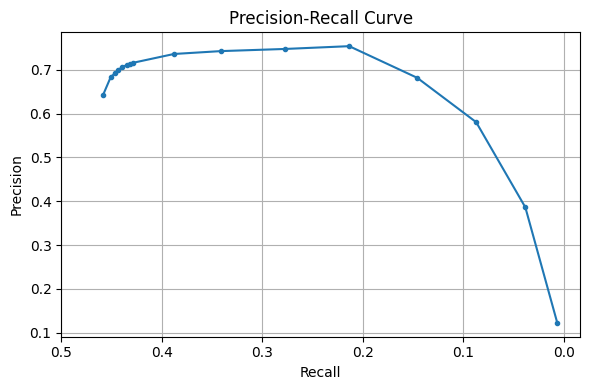

In [185]:
import matplotlib.pyplot as plt
import numpy as np

precision, recall = [x[1][0] for x in pr_], [x[1][1] for x in pr_]

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='o', markersize = 3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.xticks(np.arange(0, 0.55, step = 0.1))
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

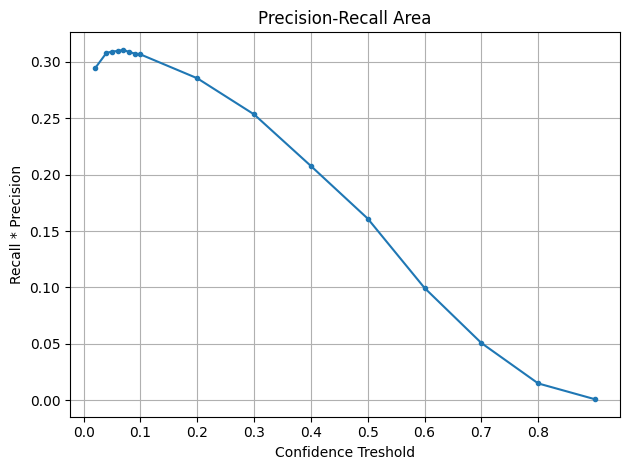

In [186]:
import matplotlib.pyplot as plt
import numpy as np
index, product = [i * 0.1 for i in range(10)], [x[1][1] * x[1][0] for x in pr_]

plt.figure()
plt.plot(threshs, product, marker='o', markersize = 3)
plt.xlabel("Confidence Treshold")
plt.ylabel("Recall * Precision")
plt.title("Precision-Recall Area")
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(0, 0.9, step = 0.1))
plt.show()

# Training Losses

ModelSeries: loadJsonData()
[loadMode] Loaded weights from c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\models\60@20@2@480\train_with_lr1e-2_tryC\checkpoints\57.pth
65


c:\Users\alexh\Desktop\cv3\obb_anns_hausarbeit\util.py:457: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))


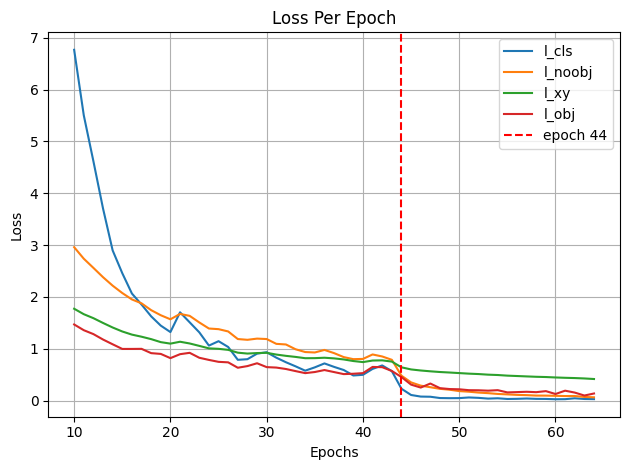

In [140]:
import ModelSeries as ms
from IPython.display import HTML, display
ms = ms.ModelSeries(name = "train_with_lr1e-2_tryC", mode="training")
records = ms.records.iloc[:]
print(len(records))
#display(HTML(records[:].to_html()))

labels =  "l_cls, l_noobj, l_xy, l_obj".split(", ")
losses = [records[k] for k in labels]
epochs = list(range(len(losses[0])))


# plt.figure()
for loss, label in zip(losses, labels):
    # if label == "mAP":
    #     loss = [x * 100 for x in loss]
    plt.plot(epochs[10:], loss[10:], label = label)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.axvline(x=44, color='red', linestyle='--', label='epoch 44')
plt.title("Loss Per Epoch")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()